In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
from pca_approach import read_video_to_movement, vectorize_movement

In [3]:
# Test Constants
data_path = "/Users/emmawaters/Desktop/Dance/greenTest/"
vid_names = os.listdir(data_path)

NUM_FRAMES = float('inf')
NUM_PARTS = 15
NUM_TIME_CHUNKS = 5

In [5]:
data_list = []
for i in range(len(vid_names)):
    data = read_video_to_movement(data_path + vid_names[i])
    data_list.append(data)
    if len(data) < NUM_FRAMES:
        NUM_FRAMES = len(data)

In [25]:
movements_list = []
for i in range(len(vid_names)):     #need to do AFTER determining min num_frames
    move_vec = vectorize_movement(data_list[i][:NUM_FRAMES], 20, NUM_PARTS, NUM_FRAMES)
    movements_list.append(np.array(move_vec))
    
X = np.array(movements_list)
print(X.shape)

(16, 1200)


[0.16318377 0.14272536 0.12055121 0.09444021 0.07800001 0.07001975
 0.0648217  0.05034871 0.04724558 0.04164168]


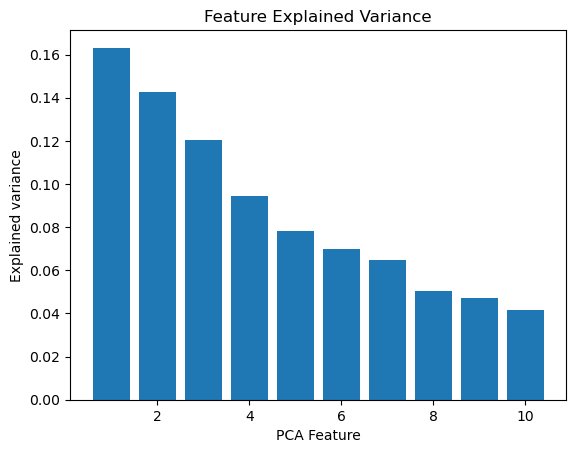

In [27]:
#Scree Plot from "https://www.jcchouinard.com/pca-with-python/"
pca = PCA(10)
pca_fit = pca.fit(X)
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
print(pca.explained_variance_ratio_)
plt.show()

[0.11917041 0.10119112]


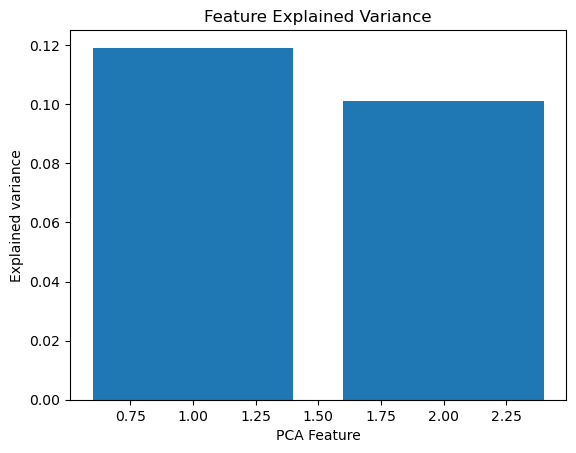

In [32]:
#Let's see what scaling the data set does...
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
pca_scaled = PCA(n_components=2)
pca_scaled_fit = pca_scaled.fit_transform(X_scaled)
print(pca_scaled.explained_variance_ratio_)

plt.bar(
    range(1,len(pca_scaled.explained_variance_ratio_)+1),
    pca_scaled.explained_variance_ratio_
    )
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [37]:
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_scaled_fit, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features  
target_names = {
    '1.mp4':'arms',
    '2.mp4':'arms', 
    '3.mp4':'arms',
    '4.mp4':'arms',
    '5.mp4':'arms',
    '6.mp4':'arms',
    '7.mp4':'arms',
    '8.mp4':'arms',
    '9.mp4':'arms',
    '10.mp4':'legs',
    '11.mp4':'legs',
    '12.mp4':'legs',
    '13.mp4':'legs',
    '14.mp4':'legs',
    '15.mp4':'legs',
    '16.mp4':'both'
}
 
pca_df['target'] = vid_names
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,PC2,target
0,-3.945827,-0.597097,arms
1,-7.184080,-5.399088,arms
2,-5.547645,-3.037273,arms
3,-9.329039,-0.217475,arms
4,-5.712539,-6.049022,arms


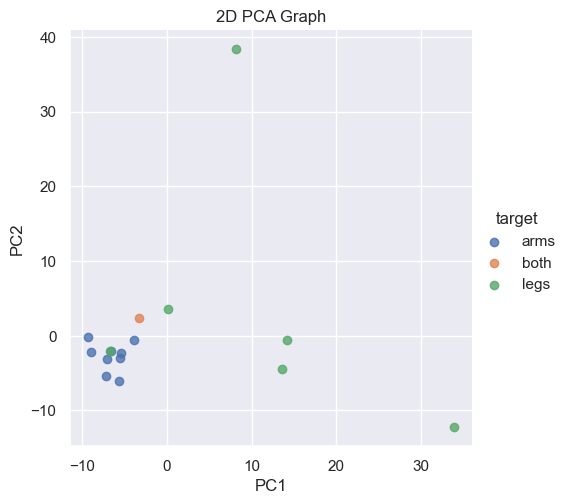

In [38]:
import seaborn as sns
sns.set()
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
 
plt.title('2D PCA Graph')
plt.show()